In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

datapath=os.getcwd()+"/examples/data/auto-mpg"
%matplotlib inline

2: Introduction To The Data
How do the properties of a car impact it's fuel efficiency?
To try to answer this question, we'll work with a dataset containing fuel efficiencies of several cars compiled by Carnegie Mellon University. The dataset is hosted by the University of California Irvine on their machine learning repository. As a side note, the UCI Machine Learning repository contains many small datasets which are useful when getting your hands dirty with machine learning.

You'll notice that the Data Folder contains a few different files. We'll be working with auto-mpg.data, which omits the 8 rows containing missing values for fuel efficiency (mpg column). Even though the file's extension is .data, it's encoded as a plain text file and you can open it using any text editor. If you opened auto-mpg.data in a text editor, you'll notice that the values in each line of the file are separated by a variable number of white spaces:

3: Exploratory Data Analysis
Using this dataset, we can work on a more narrow problem:

How does the number of cylinders, displacement, horsepower, weight, acceleration, and model year affect a car's fuel efficiency?
Let's perform some exploratory data analysis for a couple of the columns to see which one correlates best with fuel efficiency.

In [31]:
cars_name=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
cars=pd.read_table(datapath+"/auto-mpg.data.txt",delim_whitespace=True,names=cars_name,header=None)

cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


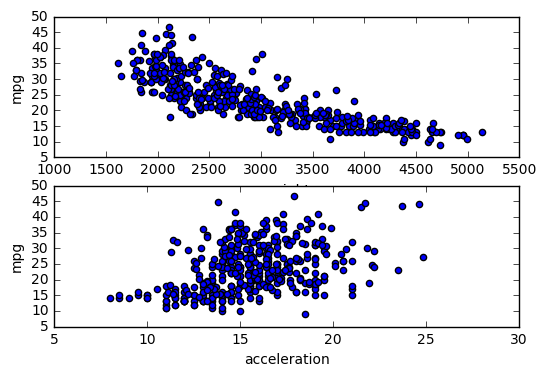

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
cars.plot("weight", "mpg", kind='scatter', ax=ax1)
cars.plot("acceleration", "mpg", kind='scatter', ax=ax2)
plt.show()

4: Linear Relationship
The scatter plots hint that there's a strong negative linear relationship between the weight and mpg columns and a weak, positive linear relationship between the acceleration and mpg columns. Let's now try to quantify the relationship between weight and mpg.

A machine learning model is the equation that represents how the input is mapped to the output. Said another way, machine learning is the process of determining the relationship between the independent variable(s) and the dependent variable. In this case, the dependent variable is the fuel efficiency and the independent variables are the other columns in the dataset.

In this mission and the next few missions, we'll focus on a family of machine learning models known as linear models. These models take the form of:

The input is represented as x, transformed using the parameters m (slope) and b (intercept), and the output is represented as y. We expect m to be a negative number since the relationship is a negative linear one.

The process of finding the equation that fits the data the best is called fitting. We won't dive into how a model is fit to the data in this mission and will instead focus on interpreting the model. We'll use the Python library scikit-learn library to handle fitting the model to the data.

Linear Regression:::::

In [43]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(cars[['weight']].values,cars['mpg'
                               ].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

You may be wondering why we'd want to make predictions for the data we trained the model on, since we already know the true fuel efficiency values. Making predictions on data used for training is the first step in the testing & evaluation process. If the model can't do a good job of even capturing the structure of the trained data, then we can't expect it to do a good job on data it wasn't trained on. This is known as underfitting, since the model under performs on the data it was fit on.

[ 19.41852276  17.96764345  19.94053224  19.96356207  19.84073631]
[ 18.  15.  18.  16.  17.]


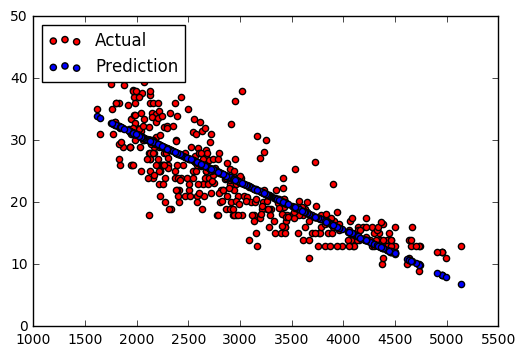

In [61]:
predictions=lr.predict(cars[['weight']].values)
print(predictions[0:5])
print(np.array(cars["mpg"][0:5]))
'''fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(cars["weight"], cars["mpg"])
ax2.scatter(cars["weight"], predictions)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()
'''


plt.scatter(cars["weight"], cars["mpg"], c='red',label='Actual')
plt.scatter(cars["weight"], predictions, c='blue',label='Prediction')
plt.legend(loc='upper left')
plt.show()

Root mean squared error, or RMSE for short, is the square root of the MSE and does a better job of penalizing large error values. In addition, the RMSE is easier to interpret since it's units are in the same dimension as the data. When computing MSE, we squared both the predicted and actual values, calculated the differences, then summed all of the differences. This means that the MSE value will be in miles per gallon squared while the RMSE value will be in miles per gallon.

In [66]:
mse = mean_squared_error(cars["mpg"], predictions)
print("Mean Squared Error:",mse)
print("RMSE:::",np.sqrt(mse))

('Mean Squared Error:', 18.780939734628397)


In [68]:
filtered_cars= cars[cars['horsepower']!='?']
filtered_cars['horsepower']=filtered_cars['horsepower'].astype(float)
filtered_cars.head(5)

/Users/manoj/installation/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


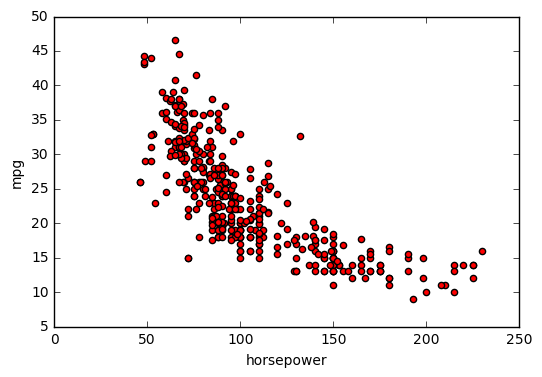

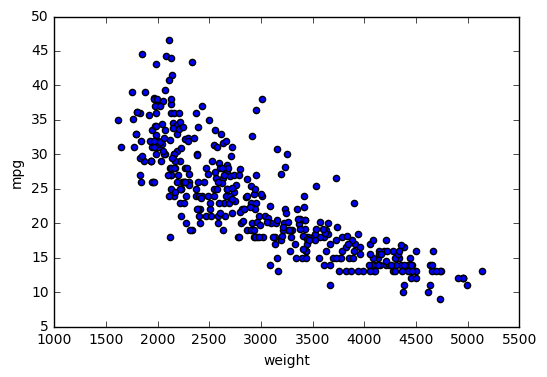

In [72]:
#Data Explorations
'''fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(filtered_cars["horsepower"], filtered_cars["mpg"])
ax2.scatter(filtered_cars["weight"], filtered_cars["mpg"])
plt.show()
'''

filtered_cars.plot('horsepower', 'mpg', kind='scatter', c='red')
filtered_cars.plot('weight', 'mpg', kind='scatter', c='blue')
plt.show()

In [75]:
lr= LinearRegression()
lr.fit(filtered_cars[['horsepower']].values,filtered_cars['mpg'].values)
predictions_hrp=lr.predict(filtered_cars[['horsepower']])
print(predictions_hrp[0:5])
print(np.array(filtered_cars["mpg"][0:5]))

[ 19.41604569  13.89148002  16.25915102  16.25915102  17.83759835]
[ 18.  15.  18.  16.  17.]


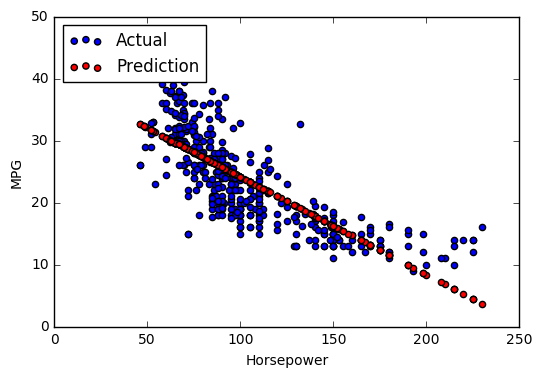

In [87]:
'''
plt.scatter(filtered_cars["horsepower"], filtered_cars["mpg"], c='red')
plt.scatter(filtered_cars["horsepower"], predictions_hrp, c='blue')
plt.show()
'''
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,1,1)
ax1.scatter(filtered_cars["horsepower"], filtered_cars["mpg"],c='blue',label='Actual')
ax2.scatter(filtered_cars["horsepower"], predictions_hrp,c='red',label='Prediction')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend(loc=2)
plt.show()

In [89]:
mse =mean_squared_error(filtered_cars["mpg"], predictions_hrp)
print("Mean Squared Error:",mse)
rmse=np.sqrt(mse)
print("RMSE:::",rmse)

('Mean Squared Error:', 23.943662938603108)
('RMSE:::', 4.8932262300657126)
